In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from lumped_parameter_model import *

## Functions

In [2]:
def explicit_solve(ht, r, w, l, kbar, b, hs, sy, dt):
    qs = 2. * kbar * w * b * (hs - ht) / l
    result = r * w * l
    result += qs
    result += w * l * sy * ht / dt
    result = result * dt / w / l / sy
    return result, qs

## Simple Drainage

In [3]:
hinit = 2.
r = 0.
w = 1000.
l = 1000.
kbar = 1000. 
b = 20.
hs = 0.
sy = 0.2
dt = 1. / 24.

In [4]:
ndays = 10
result = []
times = []
t = 0
for istep in range(24 * ndays):
    t += dt
    if istep == 0:
        hold = hinit
    else:
        hold = hnew
    hnew, qs = explicit_solve(hold, r, w, l, kbar, b, hs, sy, dt)
    times.append(t)
    result.append(hnew)

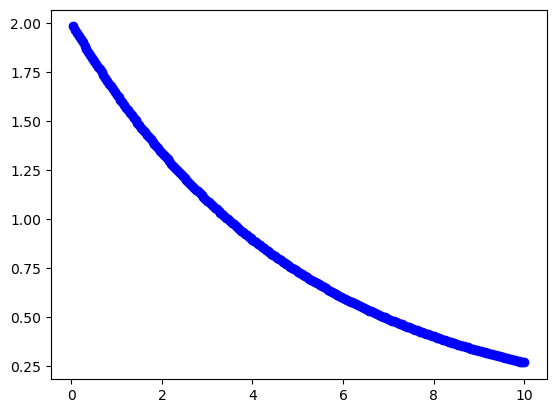

In [5]:
ax = plt.subplot(1, 1, 1)
ax.plot(times, result, "bo")

## Bear Spring Recharge

In [2]:
# load hourly recharge from Charlie
fname = "2017_2021_simulated_recharge_hourly.csv"
df = pd.read_csv(fname)
rch = df["RCH[m/day]"].to_numpy()
df

,DATE,RCH[m3/s],RCH[m/day]
0,2/1/2017 1:00,0.039531,0.000738
1,2/1/2017 2:00,0.038791,0.000724
2,2/1/2017 3:00,0.038806,0.000724
3,2/1/2017 4:00,0.038821,0.000724
4,2/1/2017 5:00,0.038834,0.000725
...,...,...,...
33571,11/30/2020 20:00,0.043738,0.000816
33572,11/30/2020 21:00,0.043725,0.000816
33573,11/30/2020 22:00,0.043712,0.000816
33574,11/30/2020 23:00,0.043699,0.000815


In [7]:
hinit = 0.
r = 0.
w = 1000.
l = 1000.
kbar = 100. 
b = 20.
hs = 0.
sy = 0.10
dt = 1. / 24.

In [8]:
nhours = 30000
result = []
discharge = []
times = []
t = 0
for istep in range(nhours):
    t += dt
    if istep == 0:
        hold = hinit
    else:
        hold = hnew
    r = rch[istep]
    hnew, qs = explicit_solve(hold, r, w, l, kbar, b, hs, sy, dt)
    times.append(t)
    result.append(hnew)
    discharge.append(-qs)

times = np.array(times)
result = np.array(result)
times = np.array(times)

C:\Users\huan1428\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\huan1428\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


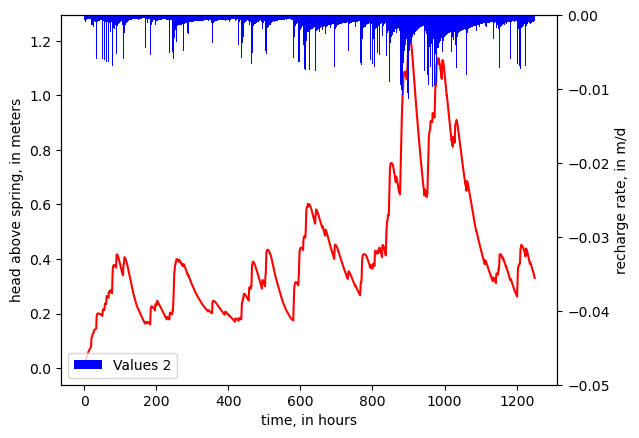

In [11]:
ax = plt.subplot(1, 1, 1)
ax.plot(times, result, "r-")
ax.set_xlabel("time, in hours")
ax.set_ylabel("head above spring, in meters")

ax2 = ax.twinx()
ax2.bar(times, [-v for v in rch[:nhours]], color='blue', label='Values 2')
ax2.set_ylim(-.05, 0)
ax2.set_ylabel("recharge rate, in m/d")
plt.legend()


Text(0, 0.5, 'spring discharge, in meters cubed per day')

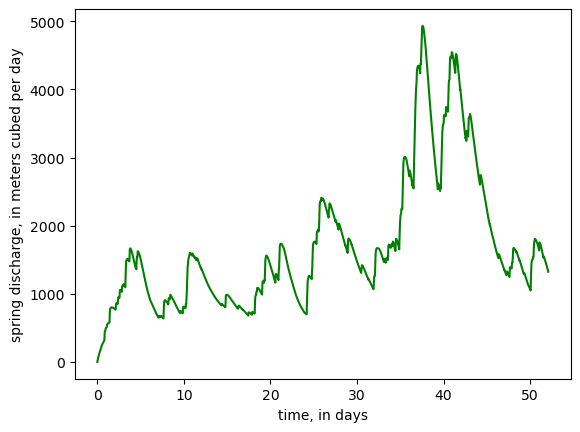

In [10]:
ax = plt.subplot(1, 1, 1)
ax.plot(times / 24, discharge, "g-")
ax.set_xlabel("time, in days")
ax.set_ylabel("spring discharge, in meters cubed per day")